In [39]:
!pip install tensorflow-gpu==2.0.0-rc0

In [40]:
!pip install mlxtend==0.17.0

In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,  MaxPool2D, Dropout


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [43]:
from tensorflow.keras.datasets import cifar10

In [44]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [61]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [46]:
X_train.max()

255

In [47]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [48]:
X_train.shape

(50000, 32, 32, 3)

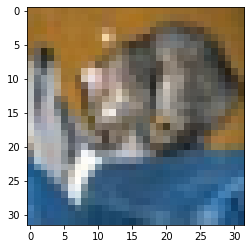

In [49]:
plt.imshow(X_test[0])

In [50]:
"""
Wen we add more convolution layers we can detect more complex patterns.

Conv2D - Convolusion layer:
  kernel_size - An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
  filters - number of filters (with size = kernel_size), each filter can detect another pattern.
  relu - no negative nambers.

MaxPool2D - reduces demesions of the image, by getting the max value of pool size matrix:
  from every matrix on the image we get 1 value.
  "https://deeplizard.com/learn/video/ZjM_XQa5s6s"
  pool_size - size of matrix
  strides - how matrix jumps
  
Dropout - decreasing variance (less overfitting).
  "https://www.youtube.com/watch?v=maSkSt7__Bg"
  "https://www.youtube.com/watch?v=lcI8ukTUEbo"

padding - One of "valid" or "same" (case-insensitive):
  "valid" means no padding. 
  "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
"""

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [52]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 227s 5ms/sample - loss: 1.3928 - sparse_categorical_accuracy: 0.5013 - val_loss: 1.1156 - val_sparse_categorical_accuracy: 0.6082
Epoch 2/10
50000/50000 [==============================] - 227s 5ms/sample - loss: 1.0780 - sparse_categorical_accuracy: 0.6176 - val_loss: 0.9844 - val_sparse_categorical_accuracy: 0.6577
Epoch 3/10
50000/50000 [==============================] - 227s 5ms/sample - loss: 0.9568 - sparse_categorical_accuracy: 0.6597 - val_loss: 0.9449 - val_sparse_categorical_accuracy: 0.6713
Epoch 4/10
50000/50000 [==============================] - 229s 5ms/sample - loss: 0.8696 - sparse_categorical_accuracy: 0.6918 - val_loss: 0.9157 - val_sparse_categorical_accuracy: 0.6771
Epoch 5/10
50000/50000 [==============================] - 228s 5ms/sample - loss: 0.8001 - sparse_categorical_accuracy: 0.7157 - val_loss: 0.9180 - val_sparse_categorical_accuracy: 0.6731
Epoch 6/10

In [53]:
history.history

{'loss': [1.3927798334658146,
  1.0780332911282777,
  0.9568326551064849,
  0.869583463793993,
  0.8001230572804808,
  0.7441335111290216,
  0.6866041916660964,
  0.6518763654731214,
  0.6162302737474441,
  0.5835100132228807],
 'sparse_categorical_accuracy': [0.5013,
  0.6176,
  0.6597,
  0.69176,
  0.71568,
  0.73472,
  0.75554,
  0.76694,
  0.7798,
  0.79328],
 'val_loss': [1.115571147710085,
  0.9844232137799263,
  0.9448567734360694,
  0.9157446921765804,
  0.9180421056747436,
  0.873089978158474,
  0.903296903297305,
  0.9210539044886827,
  0.889353249616921,
  0.9503838196918368],
 'val_sparse_categorical_accuracy': [0.6082,
  0.6577,
  0.6713,
  0.6771,
  0.6731,
  0.6885,
  0.6925,
  0.6909,
  0.6934,
  0.6897]}

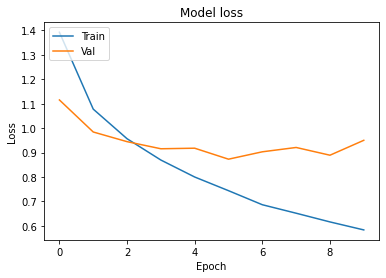

In [54]:
#plot train loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

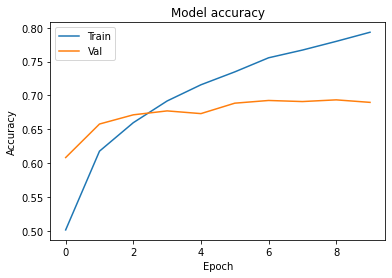

In [55]:
#plot train accuracy values
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [59]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


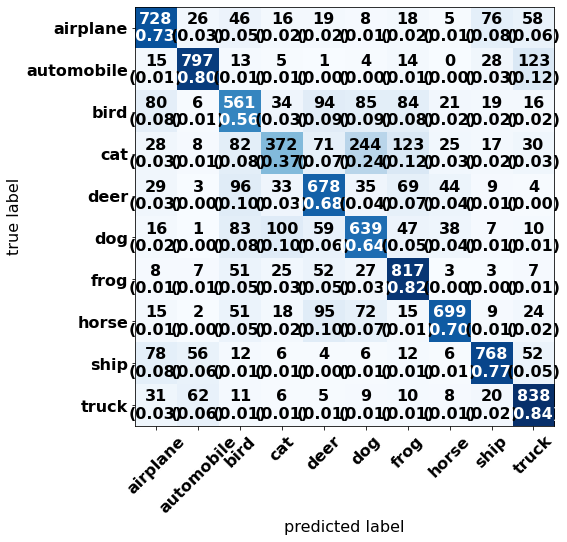

In [62]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score


font = {
    'family': 'Times New Roman',
    'weight': 'bold',
    'size': 16
}

matplotlib.rc('font', **font)

mat = confusion_matrix(Y_test, Y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(8,8), class_names=class_names, show_normed=True)
plt.tight_layout()
plt.show()